<a href="https://colab.research.google.com/github/renzotaco/IOIII/blob/main/DistanciaGPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calcular Distancia entre dos puntos GPS
La formula Harvesine para la aproximación esférica de la distancia (d) entre dos puntos de la superficie terrestre se encuentra a continuación:

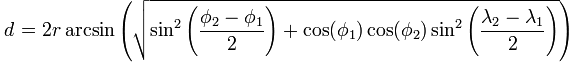

donde Φ1, Φ2 y λ1, λ2 se refieren a la latitud y a la longitud, expresadas ambas en radianes, de los puntos 1 y 2 respectivamente y r corresponde al radio terrestre (Ecuatorial 6378.1 km, Polar 6356.8 km, Medio 6371.0 km). 

In [ ]:
import math

def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(math.sin(rad*dlat/2))**2 + math.cos(rad*lat1)*math.cos(rad*lat2)*(math.sin(rad*dlon/2))**2
    distancia=2*R*math.asin(math.sqrt(a))
    return distancia

print(haversine(-17.19202, -70.93874, -17.19111, -70.92896))


1.0441098339821444


In [ ]:
from math import acos, cos, sin, radians

def distancia_puntos(punto_1, punto_2):
    punto_1 = (radians(punto_1[0]), radians(punto_1[1]))
    punto_2 = (radians(punto_2[0]), radians(punto_2[1]))

    distancia = acos(sin(punto_1[0])*sin(punto_2[0]) + cos(punto_1[0])*cos(punto_2[0])*cos(punto_1[1] - punto_2[1]))

    return distancia * 6371.01

if __name__ == "__main__":
    punto_1 = (-17.19202, -70.93874)
    punto_2 = (-17.19111, -70.92896)

    resultado = distancia_puntos(punto_1, punto_2)

    print('La distancia en kilómetros entre Punto1 y Punto2 es de %f' % resultado)

La distancia en kilómetros entre Punto1 y Punto2 es de 1.043817


In [ ]:
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#Para abrir excel
df = pd.read_excel('CPMOQ.xlsx', sheet_name=1)
 #Para abrir CSV
 #df = pd.read_csv('MapsLugares.csv')
df.head()

,Nodo,Colegio,Distrito,Lugar,Latitud,Longitud,Altitud
0,0,ALEXANDER FLEMING,MOQUEGUA,AVENIDA LA PAZ 310,-17.19202,-70.93874,1396
1,1,JUAN PABLO II,MOQUEGUA,MZ C LOTE 11,-17.19111,-70.92896,1441
2,2,BENJAMIN FRANKLIN,MOQUEGUA,JIRON LIMA 905,-17.19125,-70.93304,1417
3,3,BILINGÜE MAX UHLE,MOQUEGUA,MZ B LOTE 11,-17.19080,-70.92845,1438
4,4,CEBA - LORD BYRON,MOQUEGUA,CALLE AREQUIPA 340,-17.19325,-70.93365,1431


In [ ]:
m = folium.Map([-17.19111, -70.92896],  zoom_start=14)

for index, row in df.iterrows():
    folium.Marker([row['Latitud'], row['Longitud']], 
                  popup=row['Colegio'],
                  icon=folium.Icon(icon='ok-sign')
                 ).add_to(m)
m

In [ ]:
c = 0
la = []
lo = []
for index, row in df.iterrows():
    la.append(row['Latitud'])
    lo.append(row['Longitud'])
    c = c + 1

print(la)
print(lo)
print(c)

d = c
distancias = [[0] * c for i in range(c)]
for i in range(c):
    for j in range(d):
        distancias[i][j]=(haversine(la[i], lo[i], la[j], lo[j]))

for row in distancias:
    print(' '.join([str(elem) for elem in row]))


[-17.19202, -17.191110000000002, -17.19125, -17.1908, -17.19325, -17.19657, -17.18723, -17.19353, -17.189020000000003, -17.189420000000002, -17.188229999999997, -17.1904, -17.188679999999998, -17.19108, -17.1872, -17.18897, -17.191470000000002, -17.196360000000002, -17.1961, -17.19454, -17.197020000000002, -17.20934, -17.20901, -17.19612, -17.19124]
[-70.93874, -70.92896, -70.93304, -70.92845, -70.93365, -70.93493000000001, -70.92546, -70.93808, -70.94032, -70.93798000000001, -70.93521, -70.93139000000001, -70.9282, -70.94926, -70.92659, -70.92709, -70.92777, -70.936, -70.93405, -70.93556, -70.91508, -70.94385, -70.95671999999999, -70.94639000000001, -70.95063]
25
0.0 1.044109833982106 0.6116893206662838 1.1017724512963745 0.5578791914236744 0.6480787164115719 1.5083330630926743 0.18200507696056964 0.3735338286368389 0.30025211309262045 0.5642646748316457 0.8015060431136366 1.179961040120837 1.1227013966651578 1.3979217913747315 1.283541929508995 1.1672410445841366 0.5637223244577727 0

In [ ]:
!pip install ortools

     |████████████████████████████████| 14.5 MB 93 kB/s 
     |████████████████████████████████| 131 kB 57.2 MB/s 
     |████████████████████████████████| 1.1 MB 46.8 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.12.0
    Uninstalling absl-py-0.12.0:
      Successfully uninstalled absl-py-0.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.2.0 requires absl-py<0.13,>=0.9, but you have absl-py 0.14.1 which is incompatible.


In [ ]:
"""Simple Travelling Salesperson Problem (TSP) between cities."""

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

def create_data_model():
    def haversine(lat1, lon1, lat2, lon2):
        rad=math.pi/180
        dlat=lat2-lat1
        dlon=lon2-lon1
        R=6372.795477598
        a=(math.sin(rad*dlat/2))**2 + math.cos(rad*lat1)*math.cos(rad*lat2)*(math.sin(rad*dlon/2))**2
        distancia=2*R*math.asin(math.sqrt(a))
        return distancia
    df = pd.read_excel('CPMOQ.xlsx', sheet_name=1)
    c = 0
    la = []
    lo = []
    for index, row in df.iterrows():
        la.append(row['Latitud'])
        lo.append(row['Longitud'])
        c = c + 1
    d = c
    data = {}    
    data['distance_matrix'] = [[0] * c for i in range(c)]
    for i in range(c):
        for j in range(d):
            data['distance_matrix'][i][j]=(haversine(la[i], lo[i], la[j], lo[j]))  
    
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data


def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {} Km'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}Km\n'.format(route_distance)


def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(manager, routing, solution)


if __name__ == '__main__':
    main()

Objective: 7 Km
Route for vehicle 0:
 0 -> 23 -> 24 -> 13 -> 8 -> 19 -> 18 -> 17 -> 11 -> 16 -> 15 -> 14 -> 12 -> 10 -> 9 -> 7 -> 5 -> 4 -> 3 -> 6 -> 2 -> 1 -> 20 -> 21 -> 22 -> 0

